### A series of attempts to answer Google-able questions with the power of python. 
II. Investigate district boundaries of a few selected states: Can we redraw lines in these states more impartially? 

CD boundary shape files for 114th Congress from here:
https://www.census.gov/geo/maps-data/data/cbf/cbf_cds.html

113th district voting breakdown (I'm using the 113th voting data for 114th Congress--for now, not too concerned about this, though would need to redo more precise conclusions):
https://docs.google.com/spreadsheets/d/1VfkHtzBTP5gf4jAu8tcVQgsBJ1IDvXEHjuMqYlOgYbA/edit#gid=0

District population things:
http://www.thirty-thousand.org/documents/QHA-03.pdf

In [1]:
#!/usr/bin/env python
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import shapefile
import cv2
import random
from districtFunctions import *
%matplotlib inline

In [2]:
# Latitude/Longitude information for districts
sf = shapefile.Reader("Data/cb_2015_us_cd114_500k.shp")
district_lines = sf.shapes()

print "Shapefile fields are: \n" , sf.fields
print "Example of records line: ", sf.records()[0]

Shapefile fields are: 
[('DeletionFlag', 'C', 1, 0), ['STATEFP', 'C', 2, 0], ['CD114FP', 'C', 2, 0], ['AFFGEOID', 'C', 13, 0], ['GEOID', 'C', 4, 0], ['LSAD', 'C', 2, 0], ['CDSESSN', 'C', 3, 0], ['ALAND', 'N', 14, 0], ['AWATER', 'N', 14, 0]]
Example of records line:  ['10', '00', '5001400US1000', '1000', 'C1', '114', 5047105127, 1398742998]


In [3]:
cd_cols = ['STATE','STATEFP','CD113FP']

# Congressional District Data
cd_data = pd.read_csv("Data/national_cd113.txt",sep='      ',engine='python')
df_cd = pd.DataFrame(cd_data,columns=cd_cols)

# Voter percentage breakdown per district for 2012 + 2008 elections
voting_data = pd.read_csv("Data/DKE2012.csv",sep=',',engine='python')
df_vote = pd.DataFrame(voting_data)

ave_pop_per_district = 720000 # ~720k people per district, wikipedia
scale_factor = 1000
scaled_ave_pop = ave_pop_per_district / scale_factor

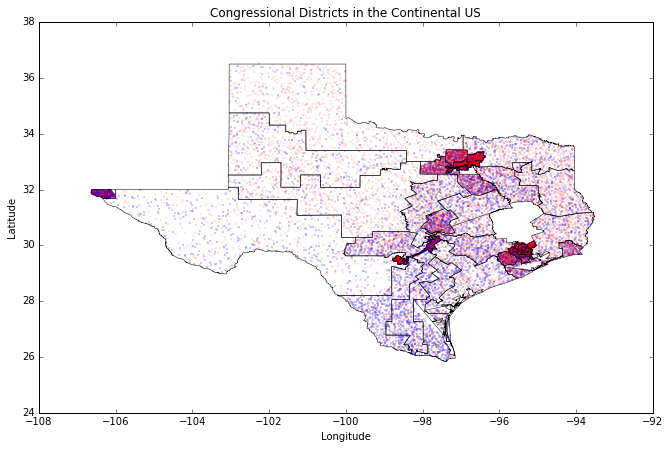

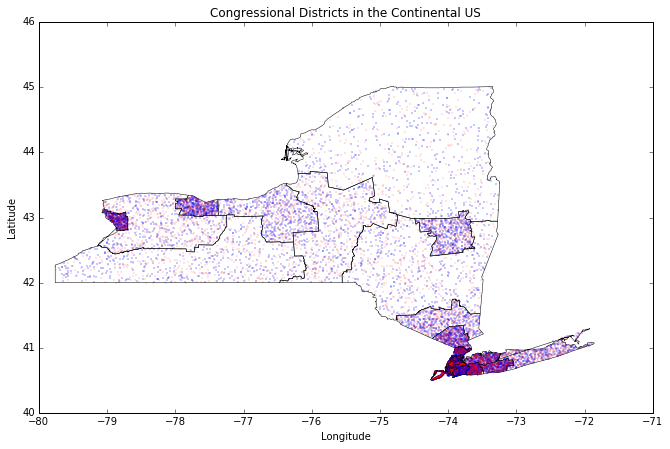

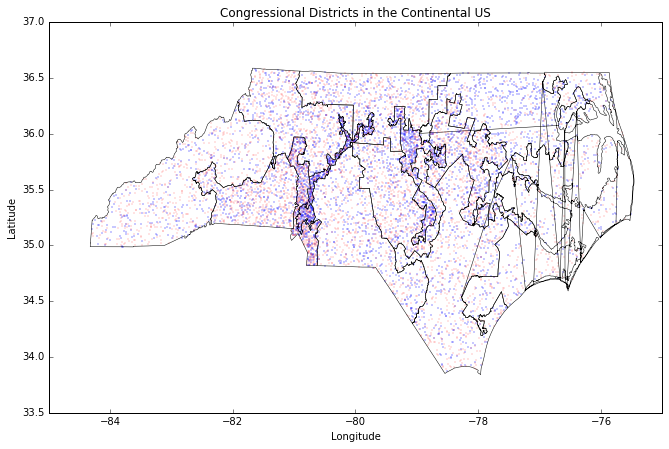

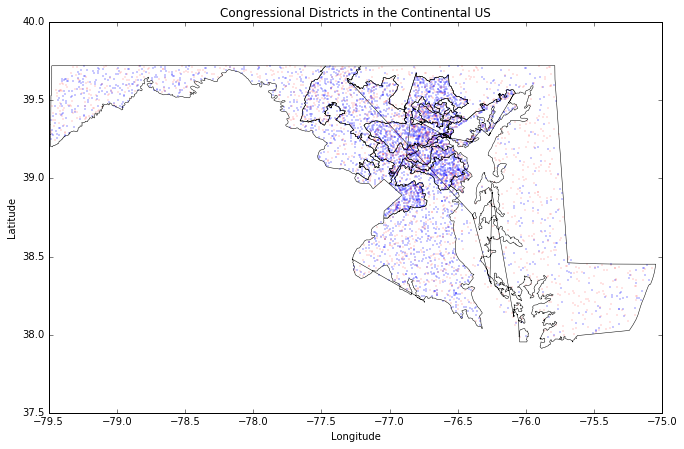

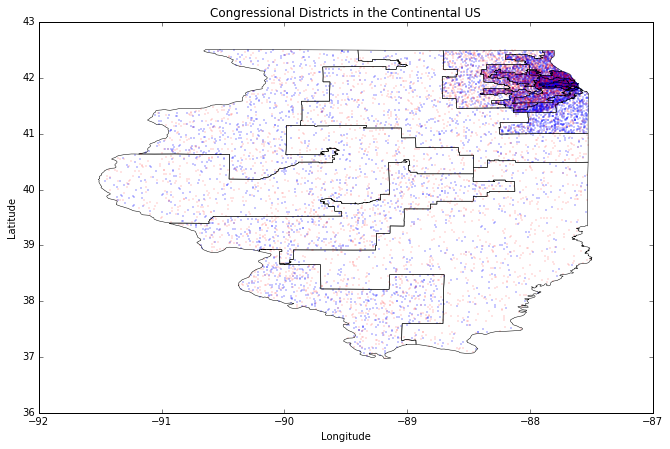

In [4]:
# Uniformly distribute the average popultion per district 
# NOTE! Colors in these plots are a little misleading. I'm plotting red 
# citizens second.  I try to balance, this by giving blue citizens higher
# alpha values, but don't think this action fully removes the bias. 

# I believe TX is missing 2 districts because I'm using information from 2
# different iterations of US congress.
tx_districts = 36
tx_state_code = 48
tx_lines, tx_pop_coords, tx_districts_v = \
  grab_district_info(sf,df_cd,df_vote,tx_districts,tx_state_code,draw=True)
    
ny_districts = 27
ny_state_code = 36
ny_lines, ny_pop_coords, ny_districts_v = \
  grab_district_info(sf,df_cd,df_vote,ny_districts,ny_state_code,draw=True)
    
nc_districts = 13
nc_state_code = 37
nc_lines, nc_pop_coords, nc_districts_v = \
  grab_district_info(sf,df_cd,df_vote,nc_districts,nc_state_code,draw=True)
    
md_districts = 8
md_state_code = 24
md_lines, md_pop_coords, md_districts_v = \
  grab_district_info(sf,df_cd,df_vote,md_districts,md_state_code,draw=True)
       
il_districts = 18
il_state_code = 17
il_lines, il_pop_coords, il_districts_v = \
  grab_district_info(sf,df_cd,df_vote,il_districts,il_state_code,draw=True)

## Use K-Means Clustering to redraw district lines based only on population
Note: This takes on the order of minutes for even a small number of iterations.

In [5]:
# Doing one example with k declared, for concreteness
iterations, k = 10, 36
tx_centroids, tx_idx_v, _ = runkMeans(tx_pop_coords,iterations,k,scaled_ave_pop)

ny_centroids, ny_idx_v, _ = runkMeans(ny_pop_coords,iterations,ny_districts,scaled_ave_pop)
nc_centroids, nc_idx_v, _ = runkMeans(nc_pop_coords,iterations,nc_districts,scaled_ave_pop)
md_centroids, md_idx_v, _ = runkMeans(md_pop_coords,iterations,md_districts,scaled_ave_pop)
il_centroids, il_idx_v, _ = runkMeans(il_pop_coords,iterations,il_districts,scaled_ave_pop)

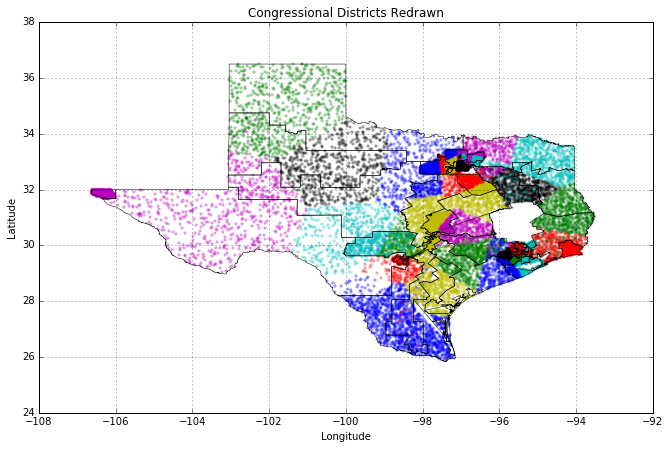

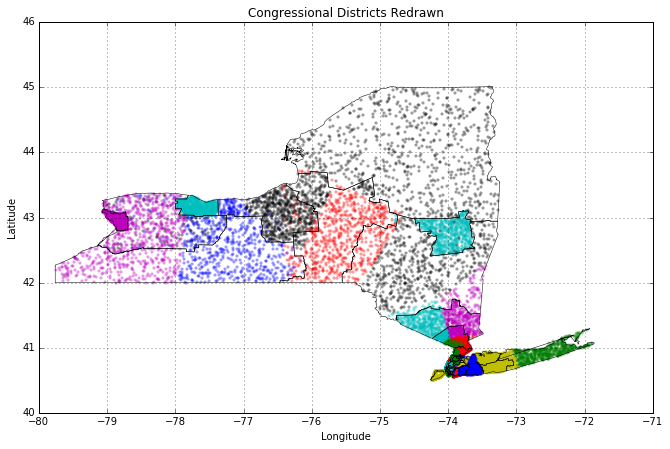

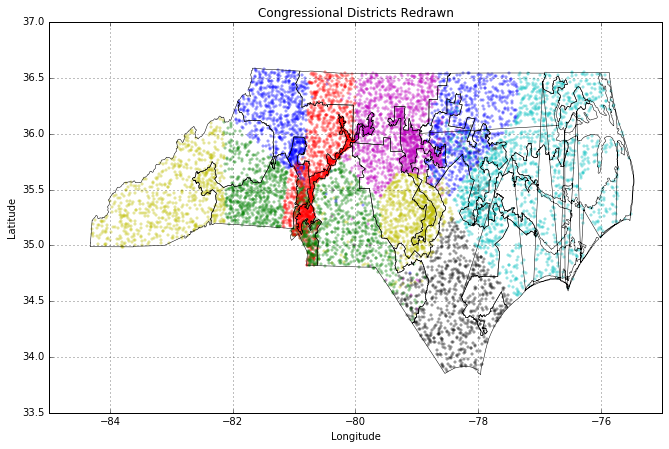

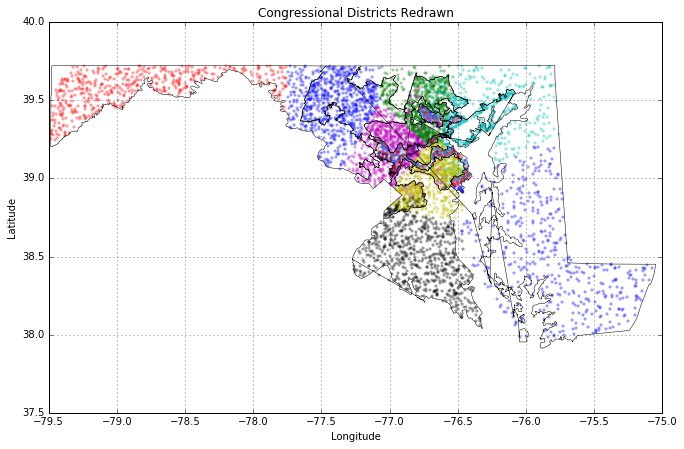

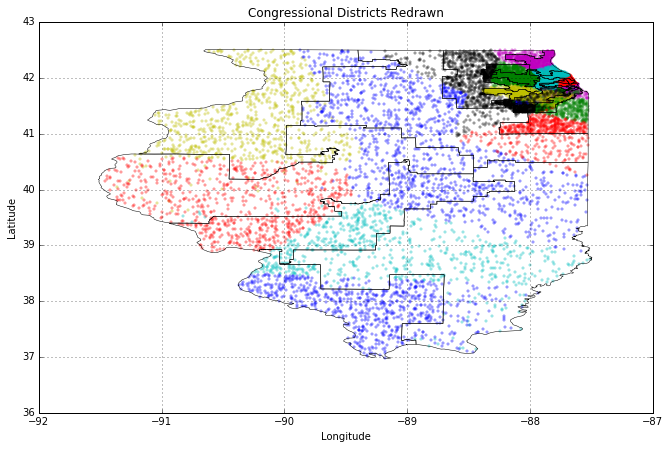

In [6]:
# Here I am plotting the results of the kmeans clustering (colored dots)
# and the old district lines in black for reference.  
plotKMeansData(tx_pop_coords,sf,tx_districts_v,tx_centroids,tx_idx_v)
plotKMeansData(ny_pop_coords,sf,ny_districts_v,ny_centroids,ny_idx_v)
plotKMeansData(nc_pop_coords,sf,nc_districts_v,nc_centroids,nc_idx_v)
plotKMeansData(md_pop_coords,sf,md_districts_v,md_centroids,md_idx_v)
plotKMeansData(il_pop_coords,sf,il_districts_v,il_centroids,il_idx_v)
# Note: aspect ratio is preliminary